# Carga de librerías y dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.dates as mdates
from matplotlib.ticker import PercentFormatter


# Plotting pretty figures and avoid blurry images
%config InlineBackend.figure_format = 'retina'

# Larger scale for plots in notebooks
sns.set_context('notebook')

In [2]:
df = pd.read_csv(r'C:\Users\faste\Documents\Cursos\ICARO- Data Science\TP1\sube2020.csv',parse_dates=['DIA_TRANSPORTE'])

<hr>

# Exploración dataset

In [3]:
df.head(20)

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR
0,2020-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,2154,NO
1,2020-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,1492,NO
2,2020-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1889,NO
3,2020-01-01,AUTOBUSES BUENOS AIRES S.R.L. – TRANSPORTE LAR...,BS_AS_LINEA_514,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,ALMIRANTE BROWN,4669,NO
4,2020-01-01,EL URBANO SRL,BS_AS_LINEA_522,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,LANUS,187,NO
5,2020-01-01,EL URBANO SRL,BS_AS_LINEA_527,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,LANUS,543,NO
6,2020-01-01,TRANSPORTES LINEA 123 S.A.C.I.,BS_ASLINEA_123,SI,COLECTIVO,NACIONAL,JN,SD,1927,NO
7,2020-01-01,TRANPORTES VEINTIDOS DE SETIEMBRE S.A.C.,BSAS_LINEA_002,SI,COLECTIVO,NACIONAL,JN,SD,6408,NO
8,2020-01-01,GENERAL TOMAS GUIDO S.A.C.I.F.,BSAS_LINEA_009,SI,COLECTIVO,NACIONAL,JN,SD,5879,NO
9,2020-01-01,LINEA 10 S.A.,BSAS_LINEA_010,SI,COLECTIVO,NACIONAL,JN,SD,4531,NO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356628 entries, 0 to 356627
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   DIA_TRANSPORTE   356628 non-null  datetime64[ns]
 1   NOMBRE_EMPRESA   356628 non-null  object        
 2   LINEA            356628 non-null  object        
 3   AMBA             356628 non-null  object        
 4   TIPO_TRANSPORTE  356628 non-null  object        
 5   JURISDICCION     354067 non-null  object        
 6   PROVINCIA        354067 non-null  object        
 7   MUNICIPIO        354067 non-null  object        
 8   CANTIDAD         356628 non-null  int64         
 9   DATO_PRELIMINAR  356628 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 27.2+ MB


In [5]:
df.isna().sum()

DIA_TRANSPORTE        0
NOMBRE_EMPRESA        0
LINEA                 0
AMBA                  0
TIPO_TRANSPORTE       0
JURISDICCION       2561
PROVINCIA          2561
MUNICIPIO          2561
CANTIDAD              0
DATO_PRELIMINAR       0
dtype: int64

In [6]:
df.describe()

,CANTIDAD
count,356628.000000
mean,5026.148881
std,13371.656183
min,-43.000000
25%,287.000000
50%,1313.000000
75%,4840.000000
max,603766.000000


<hr>


## Análisis univariado de la columna 'PROVINCIA'

#### Chequeamos valores nulos

In [7]:
print(df['PROVINCIA'].value_counts())
print('----------------------------')
print(df['PROVINCIA'].isna())
df['PROVINCIA'].isna().sum()

BUENOS AIRES        115444
MENDOZA              73880
JN                   57376
SAN JUAN             24176
JUJUY                19802
NEUQUÉN              11201
SANTA FE              8586
RÍO NEGRO             8202
ENTRE RÍOS            5957
CHUBUT                5421
CATAMARCA             5171
CHACO                 4098
SAN LUIS              4027
FORMOSA               3426
CORRIENTES            3190
LA PAMPA              2605
TIERRA DEL FUEGO       732
LA RIOJA               672
CORDOBA                101
Name: PROVINCIA, dtype: int64
----------------------------
0         False
1         False
2         False
3         False
4         False
          ...  
356623    False
356624    False
356625    False
356626    False
356627    False
Name: PROVINCIA, Length: 356628, dtype: bool


2561

#### Observamos la distribución de frecuencias a través de un gráfico de barras

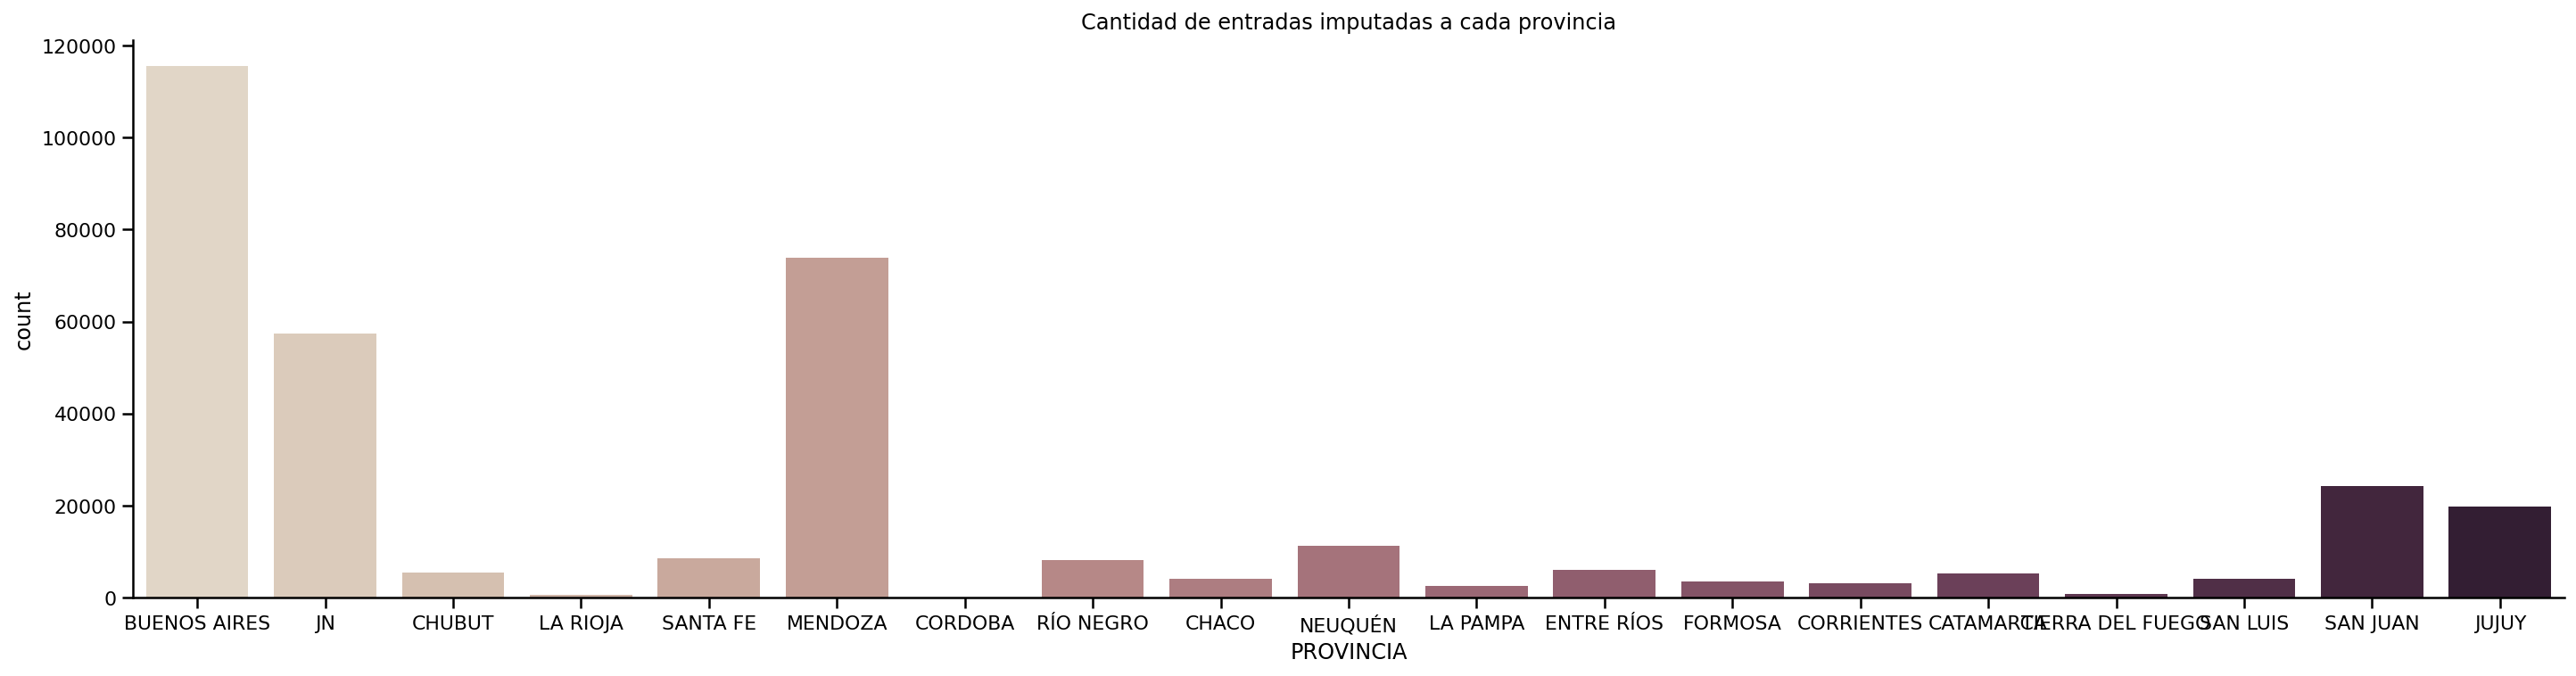

In [8]:
sns.catplot(x="PROVINCIA", kind="count", palette="ch:.25", data=df, aspect=4).set(title='Cantidad de entradas imputadas a cada provincia') #aspect = relacion largo/alto
plt.show()

In [9]:
# Agrupamos por provincia para visualizar que provincias acaparan mayor cantidad de viajes

dfp = df.groupby(['PROVINCIA']).sum().reset_index()

dfp.head(5)

,PROVINCIA,CANTIDAD
0,BUENOS AIRES,766053507
1,CATAMARCA,7687454
2,CHACO,10133793
3,CHUBUT,9340997
4,CORDOBA,14047


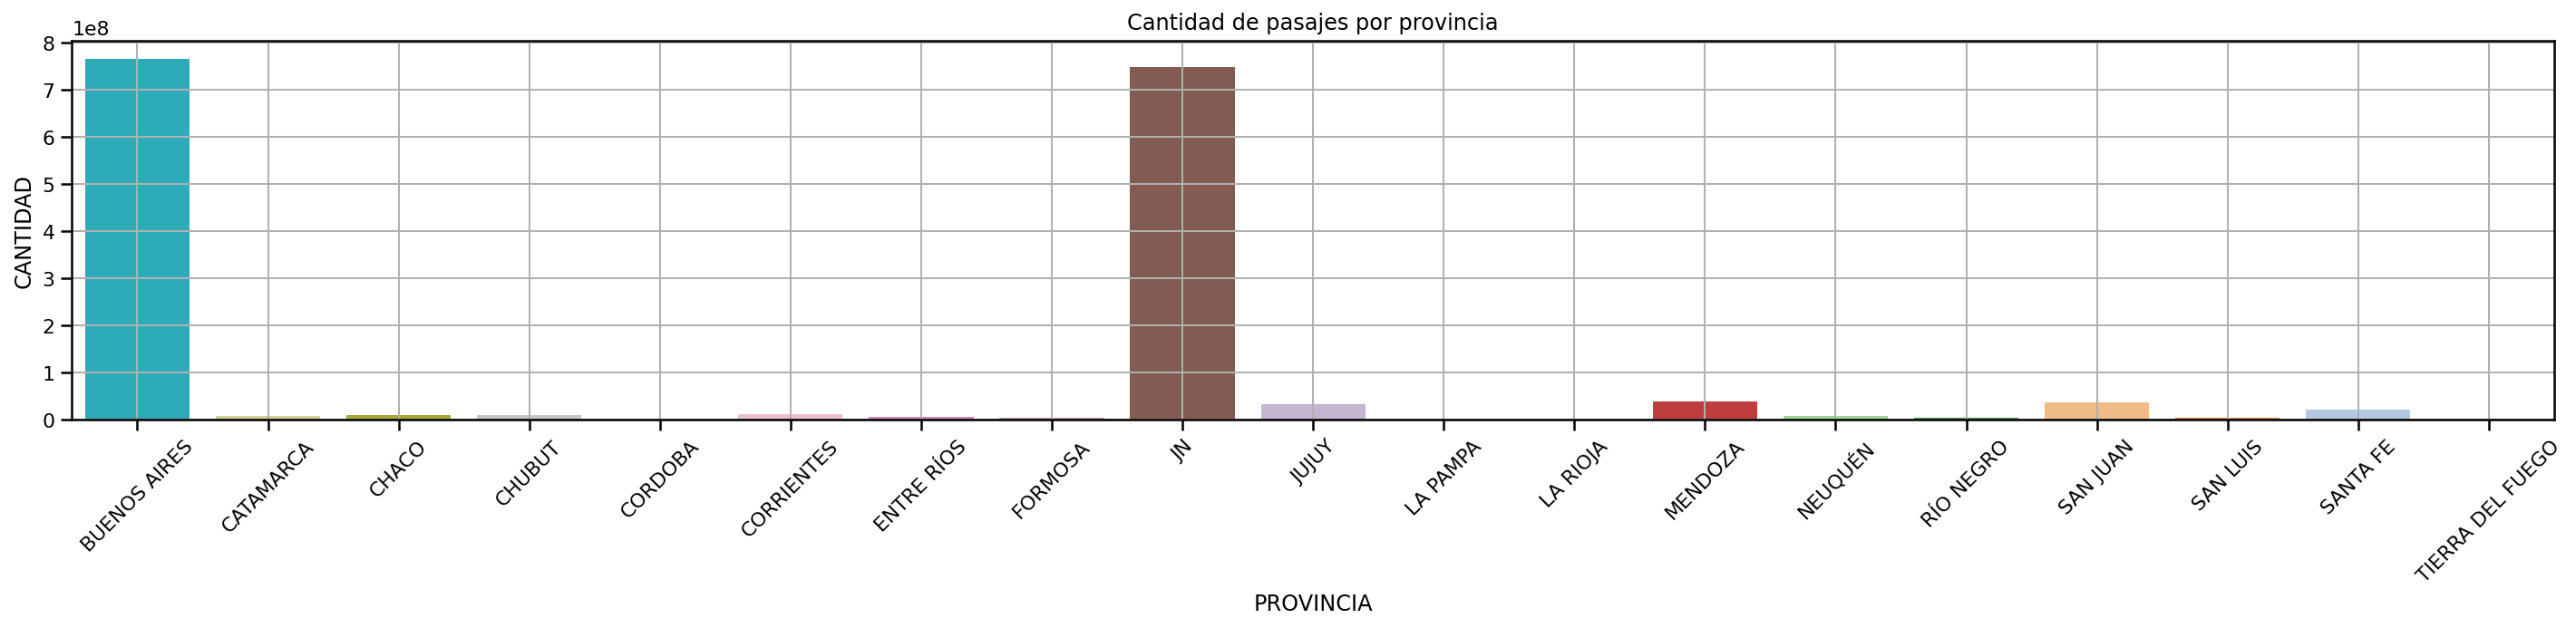

In [10]:
fig,ax = plt.subplots(1,figsize=(20,5))
sns.barplot(ax=ax,x='PROVINCIA', y='CANTIDAD', data=dfp, palette="tab20_r").set(title='Cantidad de pasajes por provincia')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
plt.tight_layout()
plt.grid()

#### Aplicamos la técnica de label encoding para poder continuar el análisis de 'PROVINCIA'

In [11]:
# Creamos una instancia del codificador de etiquetas
labelencoder = LabelEncoder()

In [12]:
# Creamos la columna 'PROVINCIA_CAT'
df['PROVINCIA_CAT'] = labelencoder.fit_transform(df['PROVINCIA'])
df.loc[:,['PROVINCIA','PROVINCIA_CAT']].sample(10)


,PROVINCIA,PROVINCIA_CAT
135386,NaN,19
48481,BUENOS AIRES,0
233467,JN,8
307960,MENDOZA,12
105720,TIERRA DEL FUEGO,18
91272,MENDOZA,12
68703,RÍO NEGRO,14
181087,MENDOZA,12
313852,JN,8
172266,JN,8


In [13]:
# De este print obtenemos la etiqueta #19 para la categoría nan
df.loc[df['PROVINCIA'].isna()][['PROVINCIA','PROVINCIA_CAT']]

,PROVINCIA,PROVINCIA_CAT
361,NaN,19
524,NaN,19
525,NaN,19
526,NaN,19
527,NaN,19
...,...,...
356254,NaN,19
356255,NaN,19
356256,NaN,19
356604,NaN,19


In [14]:
#Cantidad de variables nulas:
print('Cantidad de valores en categoría 19: ',df.loc[df['PROVINCIA_CAT']==19][['PROVINCIA','PROVINCIA_CAT']].shape[0])


Cantidad de valores en categoría 19:  2561


In [15]:
df['PROVINCIA_CAT'].value_counts()

0     115444
12     73880
8      57376
15     24176
9      19802
13     11201
17      8586
14      8202
6       5957
3       5421
1       5171
2       4098
16      4027
7       3426
5       3190
10      2605
19      2561
18       732
11       672
4        101
Name: PROVINCIA_CAT, dtype: int64

In [16]:
df.isna().sum()

DIA_TRANSPORTE        0
NOMBRE_EMPRESA        0
LINEA                 0
AMBA                  0
TIPO_TRANSPORTE       0
JURISDICCION       2561
PROVINCIA          2561
MUNICIPIO          2561
CANTIDAD              0
DATO_PRELIMINAR       0
PROVINCIA_CAT         0
dtype: int64

In [17]:
# Observamos de que tipo de dato es nuestra columna {PROVINCIA_CAT}
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356628 entries, 0 to 356627
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   DIA_TRANSPORTE   356628 non-null  datetime64[ns]
 1   NOMBRE_EMPRESA   356628 non-null  object        
 2   LINEA            356628 non-null  object        
 3   AMBA             356628 non-null  object        
 4   TIPO_TRANSPORTE  356628 non-null  object        
 5   JURISDICCION     354067 non-null  object        
 6   PROVINCIA        354067 non-null  object        
 7   MUNICIPIO        354067 non-null  object        
 8   CANTIDAD         356628 non-null  int64         
 9   DATO_PRELIMINAR  356628 non-null  object        
 10  PROVINCIA_CAT    356628 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(8)
memory usage: 28.6+ MB


#### Reemplazamos los valores que se corresponden a los nulos con SimpleImputer

In [18]:
#Dada la asimetria en la distribución de datos, consideramos más apropiada la mediana a la media
imputer=SimpleImputer(missing_values=19,strategy='median') 

In [19]:
# Ajustamos y transformamos la columna PROVINCIAS
temp_imp=imputer.fit_transform(df.PROVINCIA_CAT.values.reshape(-1, 1))
temp_imp

array([[0.],
       [0.],
       [0.],
       ...,
       [2.],
       [8.],
       [0.]])

In [20]:
# Verificacion
df['PROVINCIA_CAT'] = temp_imp
df.loc[df['PROVINCIA_CAT']==19].shape[0]

0

In [21]:
df['PROVINCIA_CAT'].value_counts()

0.0     115444
12.0     73880
8.0      59937
15.0     24176
9.0      19802
13.0     11201
17.0      8586
14.0      8202
6.0       5957
3.0       5421
1.0       5171
2.0       4098
16.0      4027
7.0       3426
5.0       3190
10.0      2605
18.0       732
11.0       672
4.0        101
Name: PROVINCIA_CAT, dtype: int64

In [22]:
# Creamos un diccionario con las claves
categ = df['PROVINCIA_CAT'].unique().astype('int')
prov = df.loc[df['PROVINCIA'].notna()]['PROVINCIA'].unique()

claves = dict(zip(categ,prov))
claves

{0: 'BUENOS AIRES',
 8: 'JN',
 3: 'CHUBUT',
 11: 'LA RIOJA',
 17: 'SANTA FE',
 12: 'MENDOZA',
 4: 'CORDOBA',
 14: 'RÍO NEGRO',
 2: 'CHACO',
 13: 'NEUQUÉN',
 10: 'LA PAMPA',
 6: 'ENTRE RÍOS',
 7: 'FORMOSA',
 5: 'CORRIENTES',
 1: 'CATAMARCA',
 18: 'TIERRA DEL FUEGO',
 16: 'SAN LUIS',
 15: 'SAN JUAN',
 9: 'JUJUY'}

#### Realizo una inspección de los datos

In [23]:
df.loc[df['PROVINCIA'].isna()][['PROVINCIA','PROVINCIA_CAT']]

,PROVINCIA,PROVINCIA_CAT
361,NaN,8.0
524,NaN,8.0
525,NaN,8.0
526,NaN,8.0
527,NaN,8.0
...,...,...
356254,NaN,8.0
356255,NaN,8.0
356256,NaN,8.0
356604,NaN,8.0


#### Aquí observamos que SimpleImputer ha rellenado todos los valores 19 con 8. 

In [24]:
df.loc[df['PROVINCIA'].isna()]['PROVINCIA_CAT'].value_counts()

8.0    2561
Name: PROVINCIA_CAT, dtype: int64

In [25]:
df[['PROVINCIA','PROVINCIA_CAT']].sample(25)

,PROVINCIA,PROVINCIA_CAT
102965,SAN JUAN,15.0
37010,MENDOZA,12.0
306490,JN,8.0
244361,NaN,8.0
79313,BUENOS AIRES,0.0
131826,MENDOZA,12.0
205506,MENDOZA,12.0
16428,JUJUY,9.0
37653,JN,8.0
351526,BUENOS AIRES,0.0


#### Reemplazo con los valores corregidos en 'PROVINCIAS'

In [26]:
# Obtengo un array con mis categorias, tipo int y órdenadas
rang = df['PROVINCIA_CAT'].unique()
rang.sort()
rang = rang.astype('int')
rang

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

In [27]:
# Realizo el reemplazo en todas las filas nan de {PROVINCIAS}

newdf= df.loc[df['PROVINCIA_CAT']==8]['PROVINCIA'].fillna(claves[8])
newdf

6         JN
7         JN
8         JN
9         JN
10        JN
          ..
356601    JN
356602    JN
356604    JN
356606    JN
356626    JN
Name: PROVINCIA, Length: 59937, dtype: object

In [28]:
# Verificamos la existencia de valores nulos
print('Cantidad de nulos: ',newdf.isna().sum())
print('Cantidad total de datos: ',newdf)

Cantidad de nulos:  0
Cantidad total de datos:  6         JN
7         JN
8         JN
9         JN
10        JN
          ..
356601    JN
356602    JN
356604    JN
356606    JN
356626    JN
Name: PROVINCIA, Length: 59937, dtype: object


In [29]:
df['PROVINCIA'].isna().sum()

2561

In [30]:
df['PROVINCIA'].fillna(newdf, inplace = True)
print(df['PROVINCIA'].isna().sum())

0


In [31]:
df.sample(50)

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR,PROVINCIA_CAT
90432,2020-03-27,ERSA URBANO SA,LINEA_005_PRN,NO,COLECTIVO,MUNICIPAL,ENTRE RÍOS,PARANA,1123,NO,6.0
108829,2020-04-16,COMPAÑIA ISLEÑA S.R.L.,BSAS_LINEA_276,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,7598,NO,0.0
342182,2020-12-17,AUTOTR TRAPICHE SRL Y TRANSP GRAL B.MITRE SRL UTE,LINEA 774,NO,COLECTIVO,PROVINCIAL,MENDOZA,SN,18,NO,12.0
154605,2020-06-05,EMPRESA DEL OESTE SAT,BSAS_LINEA_464,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,2601,NO,0.0
271373,2020-10-06,EMPRESA NUEVE DE JULIO S.A.T.,BSAS_LINEA_508C,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,LA PLATA,441,NO,0.0
251715,2020-09-16,EMPRESA DEL OESTE SAT,BSAS_LINEA_462,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,631,NO,0.0
93522,2020-03-31,JUAN B. JUSTO S.A.T.C.I.,BSAS_LINEA_034,SI,COLECTIVO,NACIONAL,JN,SD,2423,NO,8.0
248286,2020-09-12,EL CACIQUE S.A.,LINEA 928,NO,COLECTIVO,PROVINCIAL,MENDOZA,SN,302,NO,12.0
127101,2020-05-05,EXPRESO COLONIA SA,LINEA_006_NQN,NO,COLECTIVO,MUNICIPAL,NEUQUÉN,SAN MARTIN DE LOS ANDES,23,NO,13.0
102085,2020-04-08,TRANSPUNTANO SAPEM,LINEA_P_SL,NO,COLECTIVO,MUNICIPAL,SAN LUIS,SAN LUIS,46,NO,16.0


<hr>

## A continuación realizaremos el reemplazo de datos nulos de 'JURISDICCION' 

In [32]:
# Jurisdiscción

# Creamos una instancia del codificador de etiquetas
labelencoder = LabelEncoder()

# Creamos la columna 'PROVINCIA_CAT'
df['JUR_CAT'] = labelencoder.fit_transform(df['JURISDICCION'])

In [33]:
# De este print obtenemos la etiqueta #3 para la categoría nan
df.loc[df['JURISDICCION'].isna()][['JURISDICCION','JUR_CAT']]

,JURISDICCION,JUR_CAT
361,NaN,3
524,NaN,3
525,NaN,3
526,NaN,3
527,NaN,3
...,...,...
356254,NaN,3
356255,NaN,3
356256,NaN,3
356604,NaN,3


In [34]:
#Cantidad de variables nulas:
print('Cantidad de valores en categoría 3: ',df.loc[df['JUR_CAT']==3][['JURISDICCION','JUR_CAT']].shape[0])

Cantidad de valores en categoría 3:  2561


#### Reemplazamos los valores que se corresponden a los nulos con SimpleImputer

In [35]:
# Respetando el criterio tomado para las provincias utilizamos la mediana.
imputer = SimpleImputer(missing_values=3,strategy='median')

# Ajustamos y transformamos la columna JURISDICCION
temp_impJur=imputer.fit_transform(df.JUR_CAT.values.reshape(-1, 1))
temp_impJur

array([[0.],
       [2.],
       [0.],
       ...,
       [2.],
       [1.],
       [0.]])

In [36]:
# Verificacion
df['JUR_CAT'] = temp_impJur
df.loc[df['JUR_CAT']==3].shape[0]

0

In [37]:
# Creamos un diccionario con las claves
categJ = df['JUR_CAT'].unique().astype('int')
juris = df.loc[df['JURISDICCION'].notna()]['JURISDICCION'].unique()

claves = dict(zip(categJ,juris))
claves

{0: 'MUNICIPAL', 2: 'PROVINCIAL', 1: 'NACIONAL'}

#### Aquí observamos que SimpleImputer ha rellenado todos los valores 3 con 1. 

In [38]:
df.loc[df['JURISDICCION'].isna()]['JUR_CAT'].value_counts()

1.0    2561
Name: JUR_CAT, dtype: int64

In [39]:
# Obtengo un array con mis categorias, tipo int y órdenadas
rang = df['JUR_CAT'].unique()
rang.sort()
rang = rang.astype('int')
rang

array([0, 1, 2])

In [40]:
# Como sé que a todos los valores nan se les ha asignado el valor {Nacional}, efectúo el reemplazo:

#for i in rang:
    
    #if df.loc[df['JUR_CAT']==i]['JURISDICCION'].isna().sum() >0:
     #       newdf= df.loc[df['JUR_CAT']==i]['JURISDICCION'].fillna(claves[i])
            
newdf= df.loc[df['JUR_CAT']==1]['JURISDICCION'].fillna(claves[1])            
newdf

6         NACIONAL
7         NACIONAL
8         NACIONAL
9         NACIONAL
10        NACIONAL
            ...   
356601    NACIONAL
356602    NACIONAL
356604    NACIONAL
356606    NACIONAL
356626    NACIONAL
Name: JURISDICCION, Length: 59937, dtype: object

In [41]:
df['JURISDICCION'].fillna(newdf, inplace = True)
print(df['JURISDICCION'].isna().sum())

0


In [42]:
df.sample(50)

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR,PROVINCIA_CAT,JUR_CAT
204934,2020-07-29,TRANSPORTE SAN LORENZO S.A UNION TRANSITORIA,LINEA_104_CORR,NO,COLECTIVO,MUNICIPAL,CORRIENTES,CORRIENTES,4332,NO,5.0,0.0
49377,2020-02-18,EMPRESA NUEVE DE JULIO S.A.T.,BSAS_LINEA_215,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,7573,NO,0.0,2.0
27800,2020-01-28,ERSA URBANO SA,LINEA_105_CORR,NO,COLECTIVO,MUNICIPAL,CORRIENTES,CORRIENTES,10359,NO,5.0,0.0
276615,2020-10-11,EMPRESA MAIPU S.R.L,LINEA 812,NO,COLECTIVO,PROVINCIAL,MENDOZA,SN,596,NO,12.0,2.0
162025,2020-06-13,SAN VICENTE S.A. DE TRANSPORTES,BSAS_LINEA_074,SI,COLECTIVO,NACIONAL,JN,SD,1023,NO,8.0,1.0
94710,2020-04-01,TRANSPORTES 25 DE MAYO SRL,BSAS_LINEA_571,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,2105,NO,0.0,0.0
109555,2020-04-16,EMPRESA MAYO SRL,LINEA_143_SJUAN,NO,COLECTIVO,PROVINCIAL,SAN JUAN,SN,186,NO,15.0,2.0
116289,2020-04-24,LINEA 17 S.A.,BSAS_LINEA_017,SI,COLECTIVO,NACIONAL,JN,SD,8894,NO,8.0,1.0
109801,2020-04-17,CIA LA PAZ AMADOR MOURE SACIFIYA,BSAS_LINEA_277,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,1205,NO,0.0,2.0
112303,2020-04-19,COLECTIVEROS UNIDOS S.A.,LINEA_099,SI,COLECTIVO,NACIONAL,JN,SD,568,NO,8.0,1.0


<hr>

## A continuación realizaremos el reemplazo de datos nulos de 'Municipio' 

In [43]:
# Municipio

# Creamos una instancia del codificador de etiquetas
labelencoder = LabelEncoder()

# Creamos la columna 'PROVINCIA_CAT'
df['MUN_CAT'] = labelencoder.fit_transform(df['MUNICIPIO'])

In [44]:
# De este print obtenemos la etiqueta #72 para la categoría nan
df.loc[df['MUNICIPIO'].isna()][['MUNICIPIO','MUN_CAT']]

,MUNICIPIO,MUN_CAT
361,NaN,72
524,NaN,72
525,NaN,72
526,NaN,72
527,NaN,72
...,...,...
356254,NaN,72
356255,NaN,72
356256,NaN,72
356604,NaN,72


In [45]:
#Cantidad de variables nulas:
print('Cantidad de valores en categoría 72: ',df.loc[df['MUN_CAT']==72][['MUNICIPIO','MUN_CAT']].shape[0])

Cantidad de valores en categoría 72:  2561


#### Reemplazamos los valores que se corresponden a los nulos con SimpleImputer

In [46]:
# Respetando el criterio tomado para las provincias utilizamos la mediana.
imputer = SimpleImputer(missing_values=72,strategy='median')

# Ajustamos y transformamos la columna MUNICIPIO
temp_impMun=imputer.fit_transform(df.MUN_CAT.values.reshape(-1, 1))
temp_impMun

array([[17.],
       [61.],
       [17.],
       ...,
       [61.],
       [60.],
       [64.]])

In [47]:
# Verificacion
df['MUN_CAT'] = temp_impMun
df.loc[df['MUN_CAT']==72].shape[0]

0

In [48]:
# Creamos un diccionario con las claves
categM = df['MUN_CAT'].unique().astype('int')
munis = df.loc[df['MUNICIPIO'].notna()]['MUNICIPIO'].unique()

claves = dict(zip(categM,munis))
claves

{17: 'GENERAL PUEYRREDON',
 61: 'SN',
 0: 'ALMIRANTE BROWN',
 26: 'LANUS',
 60: 'SD',
 18: 'GENERAL RODRIGUEZ',
 4: 'BRANDSEN',
 29: 'LUJAN',
 32: 'MERLO',
 14: 'FLORENCIO VARELA',
 41: 'PILAR',
 11: 'ESTEBAN ECHEVERRIA',
 27: 'LOBOS',
 33: 'MORENO',
 12: 'EXALTACION DE LA CRUZ',
 30: 'MALVINAS ARGENTINAS',
 25: 'LA PLATA',
 57: 'SAN VICENTE',
 10: 'ESCOBAR',
 13: 'EZEIZA',
 28: 'LOMAS DE ZAMORA',
 1: 'AVELLANEDA',
 44: 'QUILMES',
 3: 'BERAZATEGUI',
 24: 'LA MATANZA',
 34: 'MORON',
 19: 'GENERAL SAN MARTIN',
 51: 'SAN ISIDRO',
 50: 'SAN FERNANDO',
 62: 'TIGRE',
 54: 'SAN MIGUEL',
 22: 'JOSE C. PAZ',
 64: 'URBANO DE LA COSTA',
 68: 'VILLA ALLENDE',
 7: 'CIPOLLETTI',
 37: 'OLAVARRIA',
 70: 'VILLA GESELL',
 23: 'JUNIN',
 46: 'RAWSON',
 43: 'PRESIDENCIA ROQUE SAENZ PEÑA',
 8: 'COMODORO RIVADAVIA',
 36: 'NEUQUEN',
 53: 'SAN MARTIN DE LOS ANDES',
 40: 'PERGAMINO',
 59: 'SANTA ROSA',
 39: 'PARANA',
 58: 'SANTA FE',
 55: 'SAN NICOLAS DE LOS ARROYOS',
 47: 'RESISTENCIA',
 49: 'SAN CARLOS DE BAR

#### Aquí observamos que SimpleImputer ha rellenado todos los valores 72 con 60. 

In [49]:
df.loc[df['MUNICIPIO'].isna()]['MUN_CAT'].value_counts()

60.0    2561
Name: MUN_CAT, dtype: int64

In [50]:
# Obtengo un array con mis categorias, tipo int y órdenadas
rang = df['MUN_CAT'].unique()
rang.sort()
rang = rang.astype('int')
rang

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71])

In [51]:
# Como sé que a todos los valores nan se les ha asignado el valor {SD}, efectúo el reemplazo:
newdf= df.loc[df['MUN_CAT']==60]['MUNICIPIO'].fillna(claves[60])                   
newdf

6         SD
7         SD
8         SD
9         SD
10        SD
          ..
356601    SD
356602    SD
356604    SD
356606    SD
356626    SD
Name: MUNICIPIO, Length: 59937, dtype: object

In [52]:
df['MUNICIPIO'].fillna(newdf, inplace = True)
print(df['MUNICIPIO'].isna().sum())

0


In [53]:
df.sample(50)

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR,PROVINCIA_CAT,JUR_CAT,MUN_CAT
337572,2020-12-13,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1321,NO,0.0,0.0,17.0
76245,2020-03-13,AUTOTR TRAPICHE SRL Y TRANSP GRAL B.MITRE SRL UTE,LINEA 753,NO,COLECTIVO,PROVINCIAL,MENDOZA,SN,197,NO,12.0,2.0,61.0
246096,2020-09-10,ENTE MUNICIPAL DE SERVICIOS URBANOS,LINEA 2,NO,COLECTIVO,MUNICIPAL,LA PAMPA,SANTA ROSA,643,NO,10.0,0.0,59.0
114985,2020-04-22,1 DE ENERO SRL,LINEA_002_CHA,NO,COLECTIVO,MUNICIPAL,CHACO,RESISTENCIA,711,NO,2.0,0.0,47.0
348592,2020-12-23,TRANSPORTE DE PASAJEROS EL TRIUNFO SA,LINEA_119-2_SJ,NO,COLECTIVO,PROVINCIAL,SAN JUAN,SN,78,NO,15.0,2.0,61.0
12253,2020-01-13,ERSA URBANO SA,LINEA_003_SFE,NO,COLECTIVO,MUNICIPAL,SANTA FE,SANTA FE,5266,NO,17.0,0.0,58.0
177844,2020-06-29,NUEVO SUR S.R.L.,LINEA_124-4_SJ,NO,COLECTIVO,PROVINCIAL,SAN JUAN,SN,8,NO,15.0,2.0,61.0
1346,2020-01-02,METROVIAS,LINEA SUBTE D,SI,SUBTE,NACIONAL,JN,SD,181168,NO,8.0,1.0,60.0
54588,2020-02-22,COOPERATIVA DE TRABAJO DE TRANSPORTE SAN FERNA...,LINEA_102,NO,COLECTIVO,PROVINCIAL,CATAMARCA,SN,818,NO,1.0,2.0,61.0
197436,2020-07-21,INDALO SOCIEDAD ANONIMA,LINEA_101_NQN,NO,COLECTIVO,MUNICIPAL,NEUQUÉN,NEUQUEN,78,NO,13.0,0.0,36.0


## Obtuvimos nuestro dataframe sin valores null

In [54]:
df.isna().sum()

DIA_TRANSPORTE     0
NOMBRE_EMPRESA     0
LINEA              0
AMBA               0
TIPO_TRANSPORTE    0
JURISDICCION       0
PROVINCIA          0
MUNICIPIO          0
CANTIDAD           0
DATO_PRELIMINAR    0
PROVINCIA_CAT      0
JUR_CAT            0
MUN_CAT            0
dtype: int64

In [55]:
df.drop(['PROVINCIA_CAT', 'JUR_CAT', 'MUN_CAT'], axis=1, inplace=True)

In [56]:
df.head()

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR
0,2020-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,2154,NO
1,2020-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,1492,NO
2,2020-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1889,NO
3,2020-01-01,AUTOBUSES BUENOS AIRES S.R.L. – TRANSPORTE LAR...,BS_AS_LINEA_514,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,ALMIRANTE BROWN,4669,NO
4,2020-01-01,EL URBANO SRL,BS_AS_LINEA_522,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,LANUS,187,NO


<hr>

## Cambiamos el formato de  {DIA_TRANSPORTE} y eliminamos {DATO_PRELIMINAR}

In [57]:
#df['DIA_TRANSPORTE'] = pd.to_datetime(df['DIA_TRANSPORTE'])
df['DIA_TRANSPORTE'] = df['DIA_TRANSPORTE'].dt.strftime('%d/%m/%Y')

In [58]:
# Nos deshacemos de la columna DATO_PRELIMINAR dado que no aporta al estudio
df.drop(['DATO_PRELIMINAR'], axis=1, inplace=True)

<hr>

## Análisis univariado de {CANTIDAD}

In [59]:
df.describe()

,CANTIDAD
count,356628.000000
mean,5026.148881
std,13371.656183
min,-43.000000
25%,287.000000
50%,1313.000000
75%,4840.000000
max,603766.000000


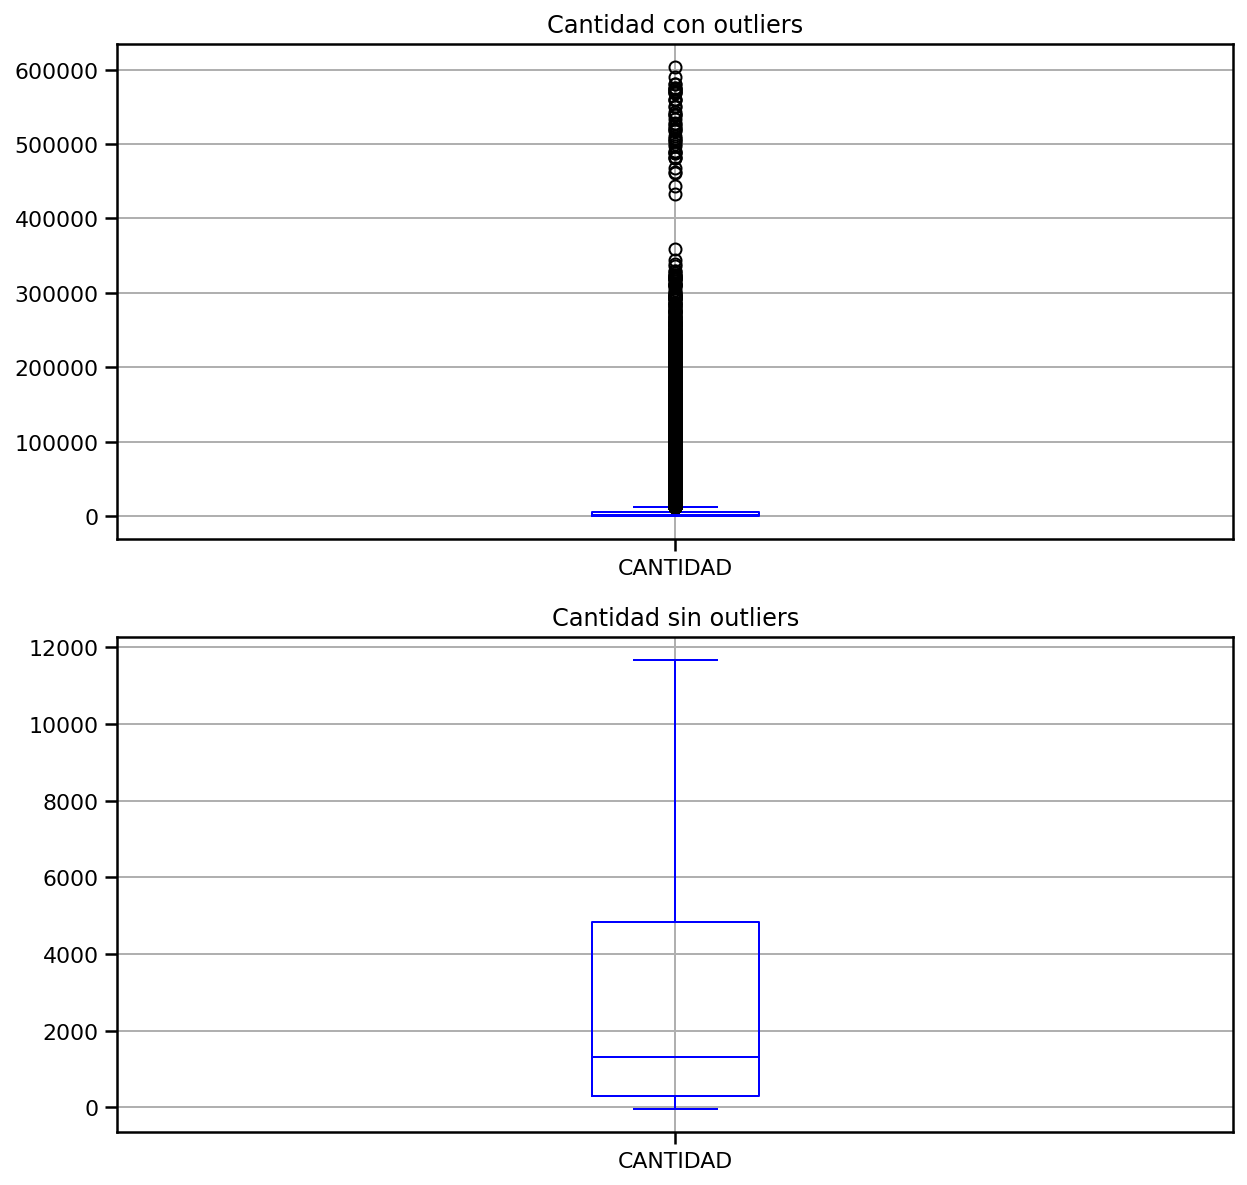

In [60]:
# A priori pareciera que tenemos outliers.

fig, ax = plt.subplots(2, figsize=(10,10))

df.CANTIDAD.plot.box('gD',ax=ax[0],title= 'Cantidad con outliers',color='b').grid()
df.CANTIDAD.plot.box('gD',ax=ax[1],title= 'Cantidad sin outliers',color='b',sym='').grid()

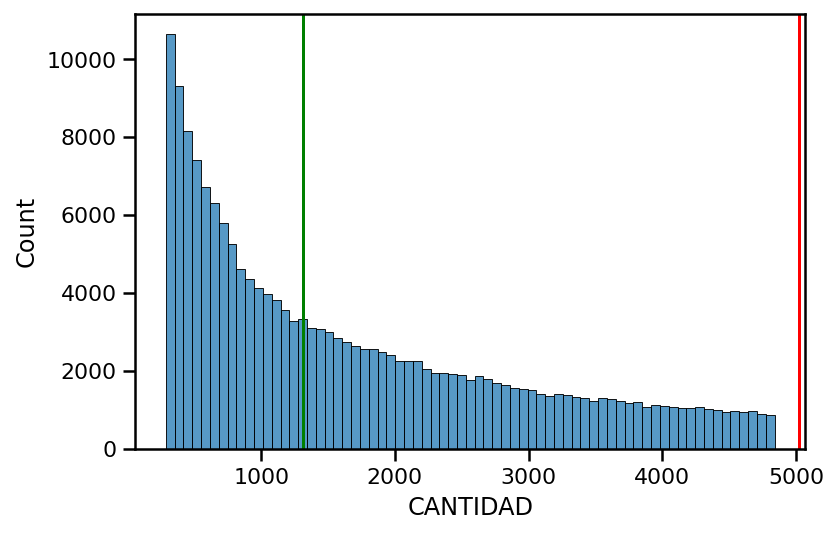

La mediana es:  1313 viajes por dia
La media es:  5026 viajes por dia
Podemos observar como influyen los valores atípicos en las medidas centrales


In [61]:
# Analizamos los cuartiles

Q1 = df['CANTIDAD'].quantile(0.25)
Q3 = df['CANTIDAD'].quantile(0.75)

mask = df['CANTIDAD'].between(Q1, Q3, inclusive=True)
iqr = df.loc[mask, 'CANTIDAD']

ax = sns.histplot(x=iqr)
plt.axvline(x=df['CANTIDAD'].median(), color='g')
plt.axvline(x=df['CANTIDAD'].mean(), color='r')
plt.show()

print('La mediana es: ',int(df['CANTIDAD'].median()),'viajes por dia')
print('La media es: ',int(df['CANTIDAD'].mean()),'viajes por dia')
print('Podemos observar como influyen los valores atípicos en las medidas centrales')

## Interpretemos los outliers

In [62]:
# Cantidad de datos en el Q4
df.loc[df['CANTIDAD'] > Q3]['CANTIDAD'].value_counts().sum()

89150

In [63]:
# Cuántas entradas con más de 300000 viajes hay? 
df.loc[df['CANTIDAD'] > 300000]['CANTIDAD'].value_counts().sum()

79

In [64]:
# En qué fechas han ocurrido?
df.loc[df['CANTIDAD'] > 300000][['DIA_TRANSPORTE','CANTIDAD']]

,DIA_TRANSPORTE,CANTIDAD
1121,02/01/2020,491193
2112,03/01/2020,528654
4987,06/01/2020,524068
5991,07/01/2020,533804
6998,08/01/2020,521248
...,...,...
74840,12/03/2020,571821
74843,12/03/2020,312795
75986,13/03/2020,571323
75989,13/03/2020,318983


## Graficamos la distribución de los outliers durante el año

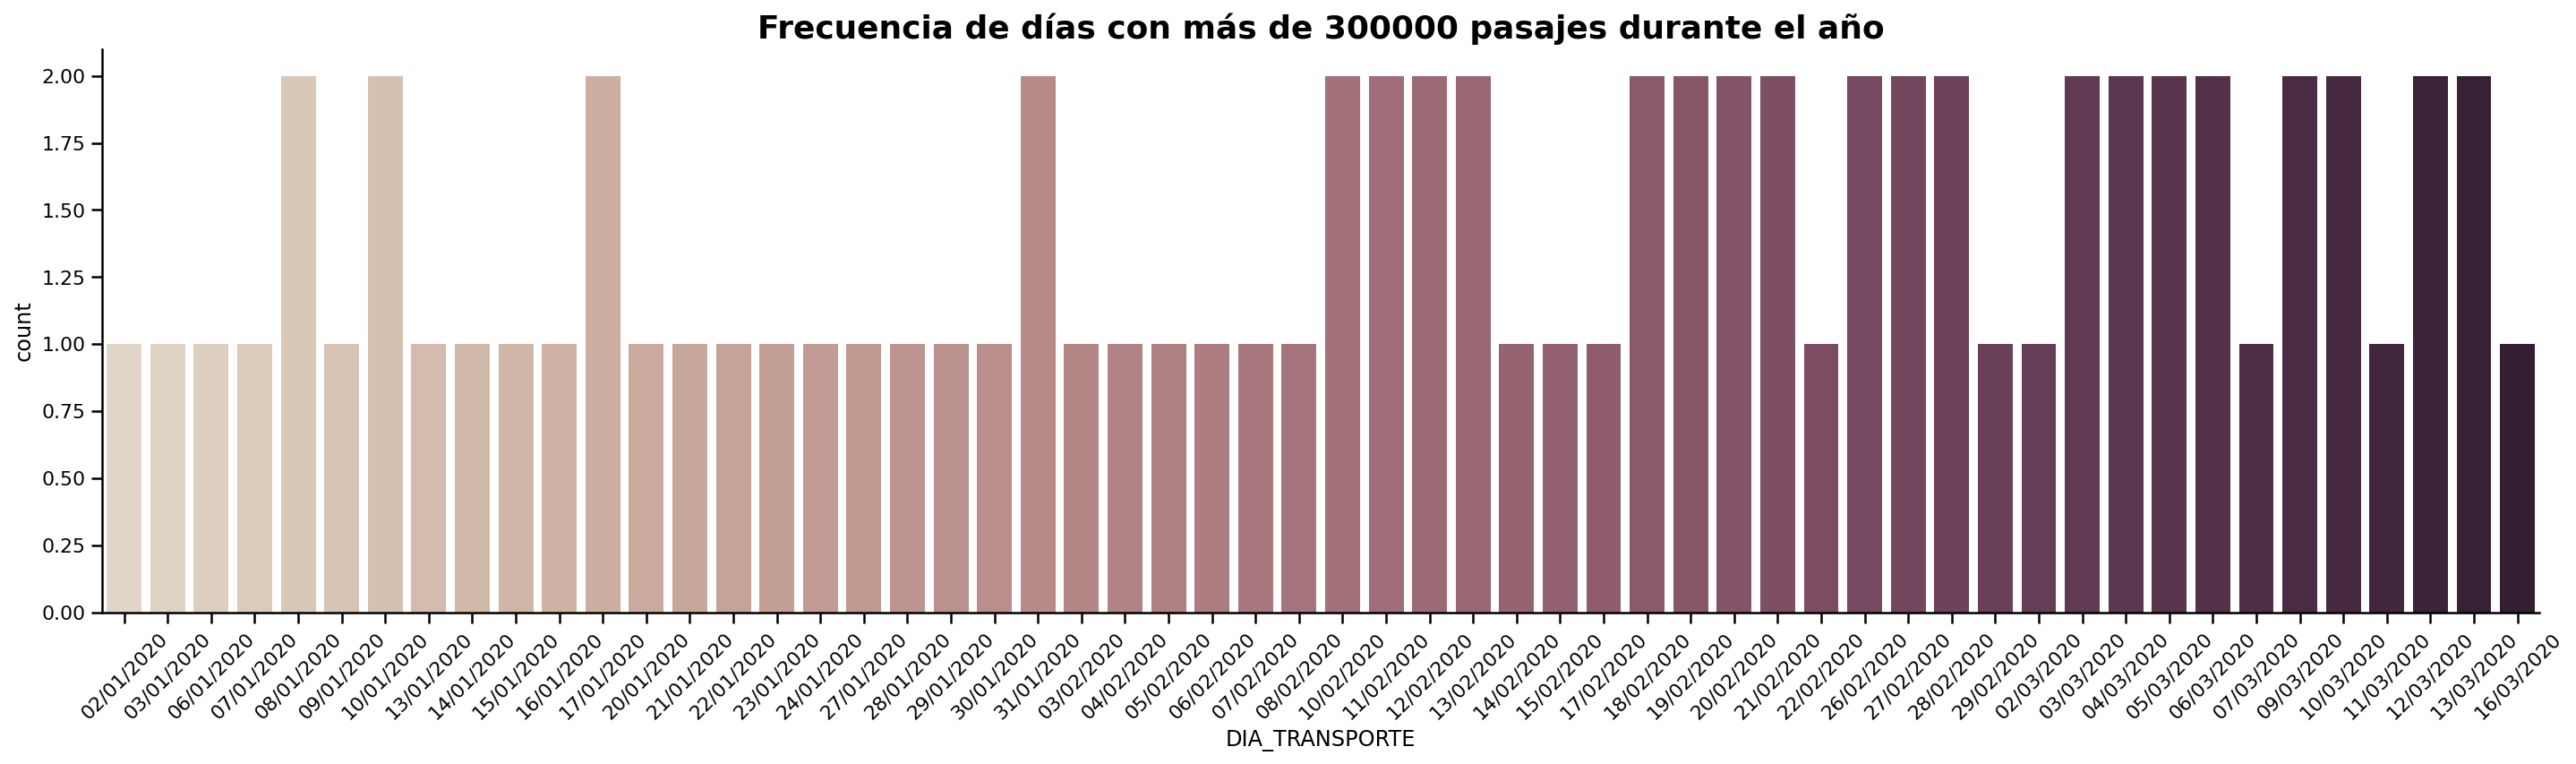

In [65]:
ax = sns.catplot(x='DIA_TRANSPORTE', kind="count", palette="ch:.25", data=df.loc[df['CANTIDAD'] > 300000][['DIA_TRANSPORTE','CANTIDAD']], aspect=4) 
ax.set_xticklabels(rotation=45)
plt.title('Frecuencia de días con más de 300000 pasajes durante el año', weight='bold').set_fontsize('18')
plt.show()

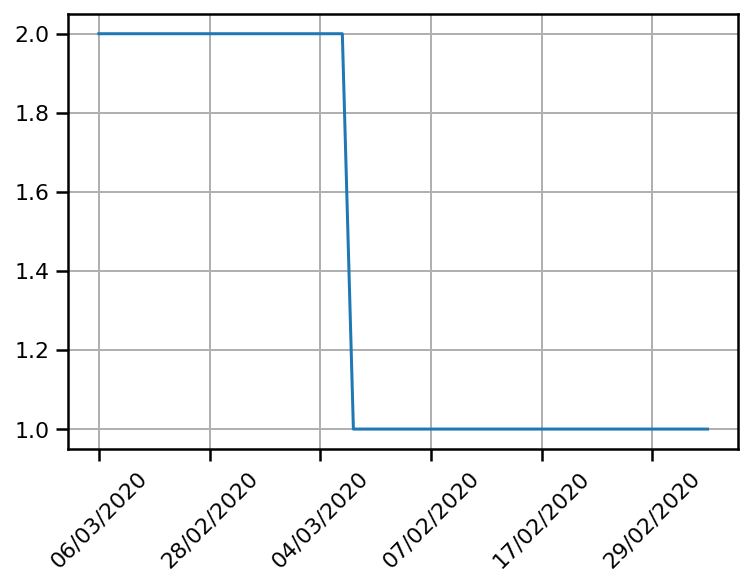

In [66]:
df.loc[df['CANTIDAD'] > 300000]['DIA_TRANSPORTE'].value_counts().plot(rot=45).grid()
plt.show()


    Como podemos observar, las entradas con una cantidad de pasajes superior a 300000 ocurren todas entre el 2 de enero y el 16 de marzo, coincidente con la temporada de verano en Argentina. Podríamos considerar que estos valores atípicos son causa del movimiento de masas de turistas que utilizan el transporte público en los sitios donde vacacionan.

<hr>

## Analizamos cantidad de viajes en conjunto con las fechas

### Agregamos por  mes

In [67]:
dfg = df.groupby(['DIA_TRANSPORTE']).sum()
dfg = dfg.loc[dfg['CANTIDAD']>300000].reset_index()
dfg['DIA_TRANSPORTE'] = pd.to_datetime(dfg['DIA_TRANSPORTE'])
dfg['Mes'] = dfg['DIA_TRANSPORTE'].dt.month
dfg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DIA_TRANSPORTE  366 non-null    datetime64[ns]
 1   CANTIDAD        366 non-null    int64         
 2   Mes             366 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 8.7 KB


In [68]:
dfg = dfg.groupby(['Mes']).sum()
dfg

,CANTIDAD
Mes,
1,243686680
2,239667424
3,140023812
4,105066258
5,111352217
6,114522519
7,114929832
8,110859648
9,128024853


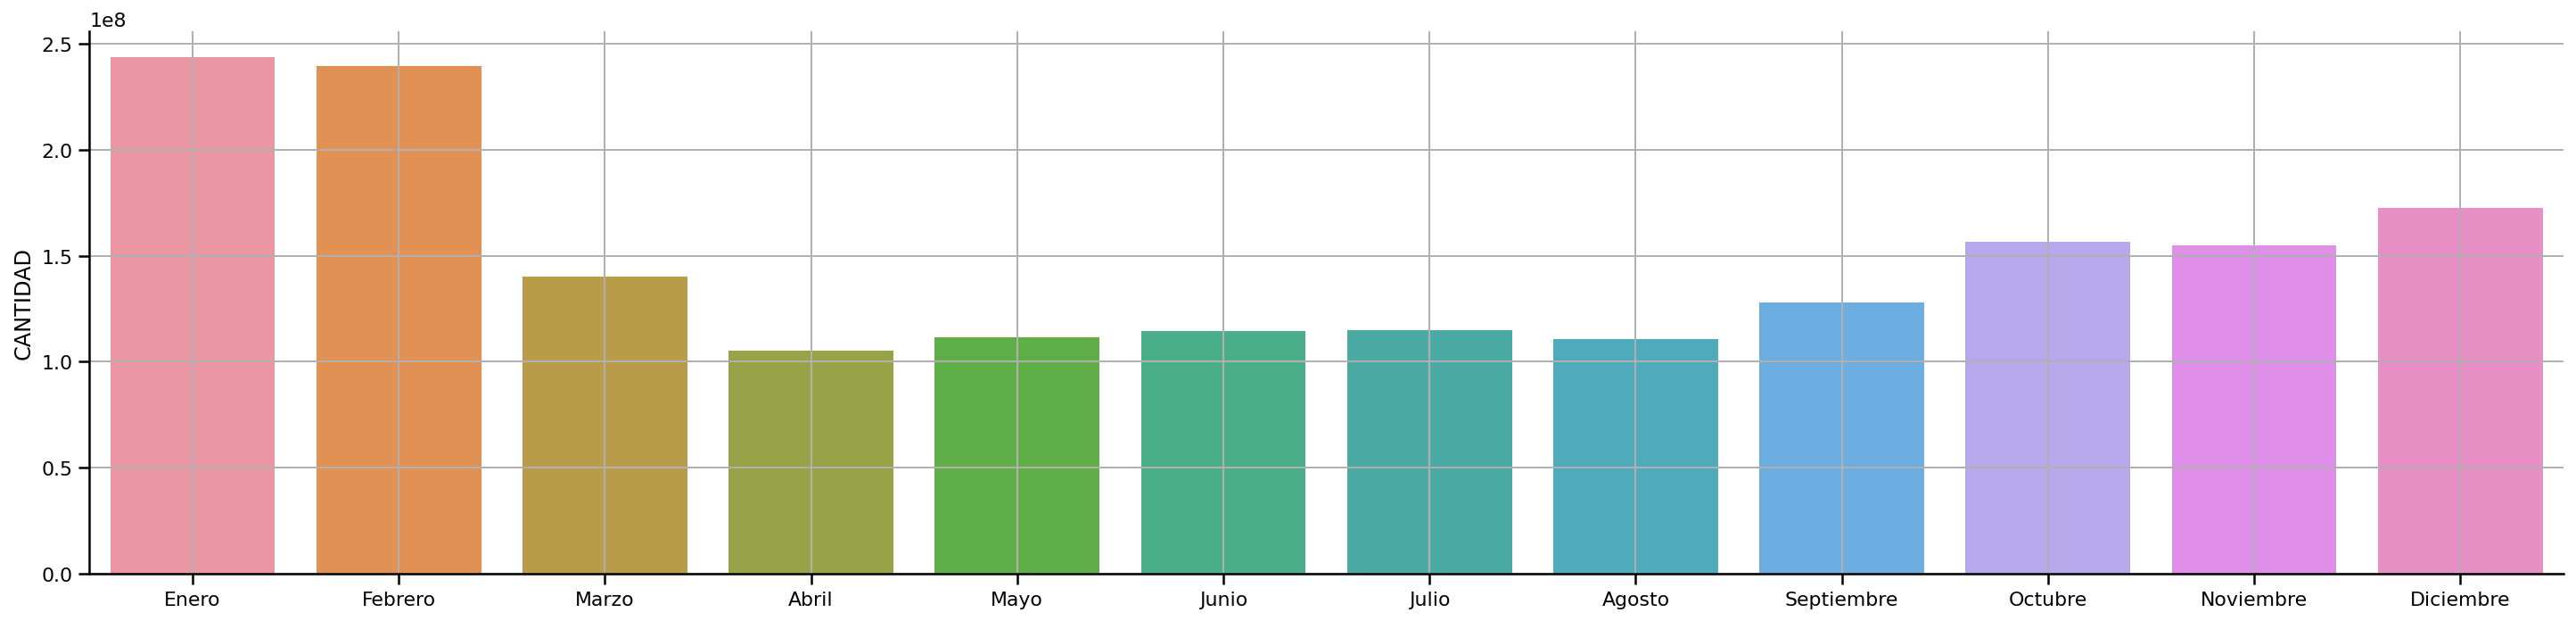

In [69]:
Meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
         'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
ax = sns.catplot(x=Meses,y='CANTIDAD', data=dfg, kind='bar',aspect=4)
plt.grid()
plt.show()

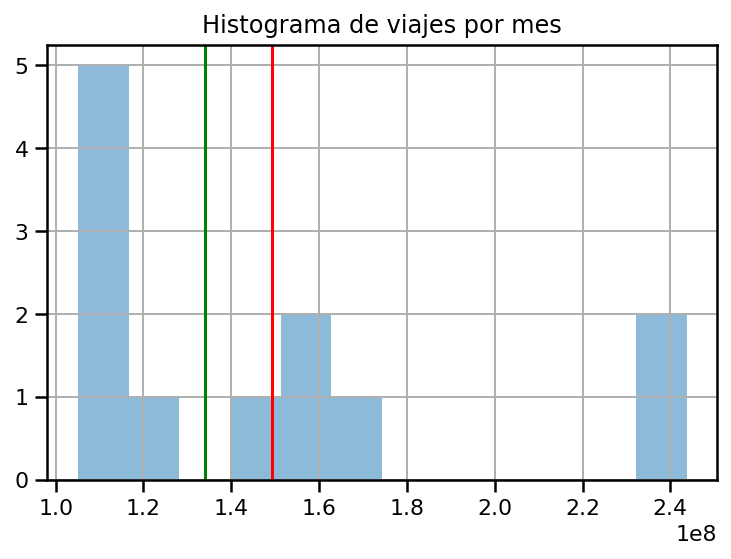

La cantidad media mensual de viajes, en rojo, es de :  149372118 viajes
La mediana de la cantidad mensual de viajes, en verde, es de :  134024332 viajes
Claramente podemos observar como impactan Enero y Febrero sobre la media


In [70]:
plt.hist(dfg['CANTIDAD'],bins=12, alpha=0.5)
plt.grid()
plt.title('Histograma de viajes por mes')
plt.axvline(x=dfg['CANTIDAD'].mean(), color='r')
plt.axvline(x=dfg['CANTIDAD'].median(), color='g')
plt.show()
print('La cantidad media mensual de viajes, en rojo, es de : ',int(dfg['CANTIDAD'].mean()),'viajes')
print('La mediana de la cantidad mensual de viajes, en verde, es de : ',int(dfg['CANTIDAD'].median()),'viajes')
print('Claramente podemos observar como impactan Enero y Febrero sobre la media')

<hr>

## Provincias más visitadas en verano

In [71]:
df.head()

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD
0,01/01/2020,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,2154
1,01/01/2020,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,1492
2,01/01/2020,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1889
3,01/01/2020,AUTOBUSES BUENOS AIRES S.R.L. – TRANSPORTE LAR...,BS_AS_LINEA_514,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,ALMIRANTE BROWN,4669
4,01/01/2020,EL URBANO SRL,BS_AS_LINEA_522,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,LANUS,187


In [72]:
# Descartamos diciembre dado que no corresponde a la misma temporada de verano que Enero, Febrero y Marzo
Meses_verano = [1,2,3]

# Nuevamente casteamos a tipo datetime la columna {DIA_TRANSPORTE}. Por alguna razón no mantiene el formato
df['DIA_TRANSPORTE'] = pd.to_datetime(df['DIA_TRANSPORTE'])

# Extraemos a qué mes corresponde cada entrada
df['Mes'] = df['DIA_TRANSPORTE'].dt.month
dfV = df.loc[df['Mes'].isin(Meses_verano)]
dfV

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,Mes
0,2020-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,2154,1
1,2020-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,1492,1
2,2020-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1889,1
3,2020-01-01,AUTOBUSES BUENOS AIRES S.R.L. – TRANSPORTE LAR...,BS_AS_LINEA_514,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,ALMIRANTE BROWN,4669,1
4,2020-01-01,EL URBANO SRL,BS_AS_LINEA_522,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,LANUS,187,1
...,...,...,...,...,...,...,...,...,...,...
328708,2020-03-12,LA COMARCA SA,Línea E,NO,COLECTIVO,MUNICIPAL,RÍO NEGRO,VIEDMA,831,3
328709,2020-03-12,EMPRESA CEFERINO SOCIEDAD ANONIMA,Línea G,NO,COLECTIVO,MUNICIPAL,RÍO NEGRO,VIEDMA,98,3
328710,2020-03-12,UNION PLATENSE SRL,NORTE MUNICIPAL,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,LA PLATA,5388,3
328711,2020-03-12,A T A C O NORTE S A C I,RES_PUERTO_TIROL_Y VIC,NO,COLECTIVO,PROVINCIAL,CHACO,SN,837,3


In [73]:
# Verificamos que sólo hayamos mantenido los meses de verano
dfV['Mes'].value_counts()

1    30896
3    30652
2    29965
Name: Mes, dtype: int64

In [74]:
# Eliminamos las columnas que no vamos a utilizar
dfV=dfV.drop(columns=['DIA_TRANSPORTE','NOMBRE_EMPRESA','LINEA','JURISDICCION','AMBA'])
dfV

,TIPO_TRANSPORTE,PROVINCIA,MUNICIPIO,CANTIDAD,Mes
0,COLECTIVO,BUENOS AIRES,GENERAL PUEYRREDON,2154,1
1,COLECTIVO,BUENOS AIRES,SN,1492,1
2,COLECTIVO,BUENOS AIRES,GENERAL PUEYRREDON,1889,1
3,COLECTIVO,BUENOS AIRES,ALMIRANTE BROWN,4669,1
4,COLECTIVO,BUENOS AIRES,LANUS,187,1
...,...,...,...,...,...
328708,COLECTIVO,RÍO NEGRO,VIEDMA,831,3
328709,COLECTIVO,RÍO NEGRO,VIEDMA,98,3
328710,COLECTIVO,BUENOS AIRES,LA PLATA,5388,3
328711,COLECTIVO,CHACO,SN,837,3


In [75]:
# Agrupamos por mes y provincia para obtener subtotales por mes

dfV = dfV.groupby(['Mes','PROVINCIA']).sum().reset_index()
dfV.head(50)

,Mes,PROVINCIA,CANTIDAD
0,1,BUENOS AIRES,97752288
1,1,CATAMARCA,829375
2,1,CHACO,1856851
3,1,CHUBUT,1203024
4,1,CORDOBA,3403
5,1,CORRIENTES,1599219
6,1,ENTRE RÍOS,1093428
7,1,FORMOSA,594345
8,1,JN,122528735
9,1,JUJUY,4127601


### Realizamos análisis de Pareto

In [76]:
# Creamos una columna con porcentajes acumulados para cada mes del verano, y así construir un diagrama de Pareto

enero = dfV[dfV['Mes']==1][['PROVINCIA','CANTIDAD']].sort_values(by='CANTIDAD',ascending=False)
enero['Por_Acu'] = enero['CANTIDAD'].cumsum()/enero['CANTIDAD'].sum()*100

febrero = dfV[dfV['Mes']==2][['PROVINCIA','CANTIDAD']].sort_values(by='CANTIDAD',ascending=False)
febrero['Por_Acu'] = febrero['CANTIDAD'].cumsum()/febrero['CANTIDAD'].sum()*100

marzo = dfV[dfV['Mes']==3][['PROVINCIA','CANTIDAD']].sort_values(by='CANTIDAD',ascending=False)
marzo['Por_Acu'] = marzo['CANTIDAD'].cumsum()/marzo['CANTIDAD'].sum()*100

In [77]:
def Pareto(df,mes,a):
   
    
    # Hacemos el gráfico de barras para el mes en cuestión
    sns.barplot(ax=ax[a],x='PROVINCIA', y='CANTIDAD', data=df, palette="tab20_r").set(title=mes)
    ax[a].set_xticklabels(ax[a].get_xticklabels(),rotation = 45)
    plt.tight_layout()
    plt.grid()
    # Añadimos nuestra línea de porcentajes acumulados
    ax2 = ax[a].twinx()
    ax2.plot(df['PROVINCIA'], df['Por_Acu'], color='r', marker="D", ms=4)
    ax2.yaxis.set_major_formatter(PercentFormatter())

    # Especificamos el color d elos ejes
    ax[a].tick_params(axis='y', colors='steelblue')
    ax2.tick_params(axis='y', colors='r')

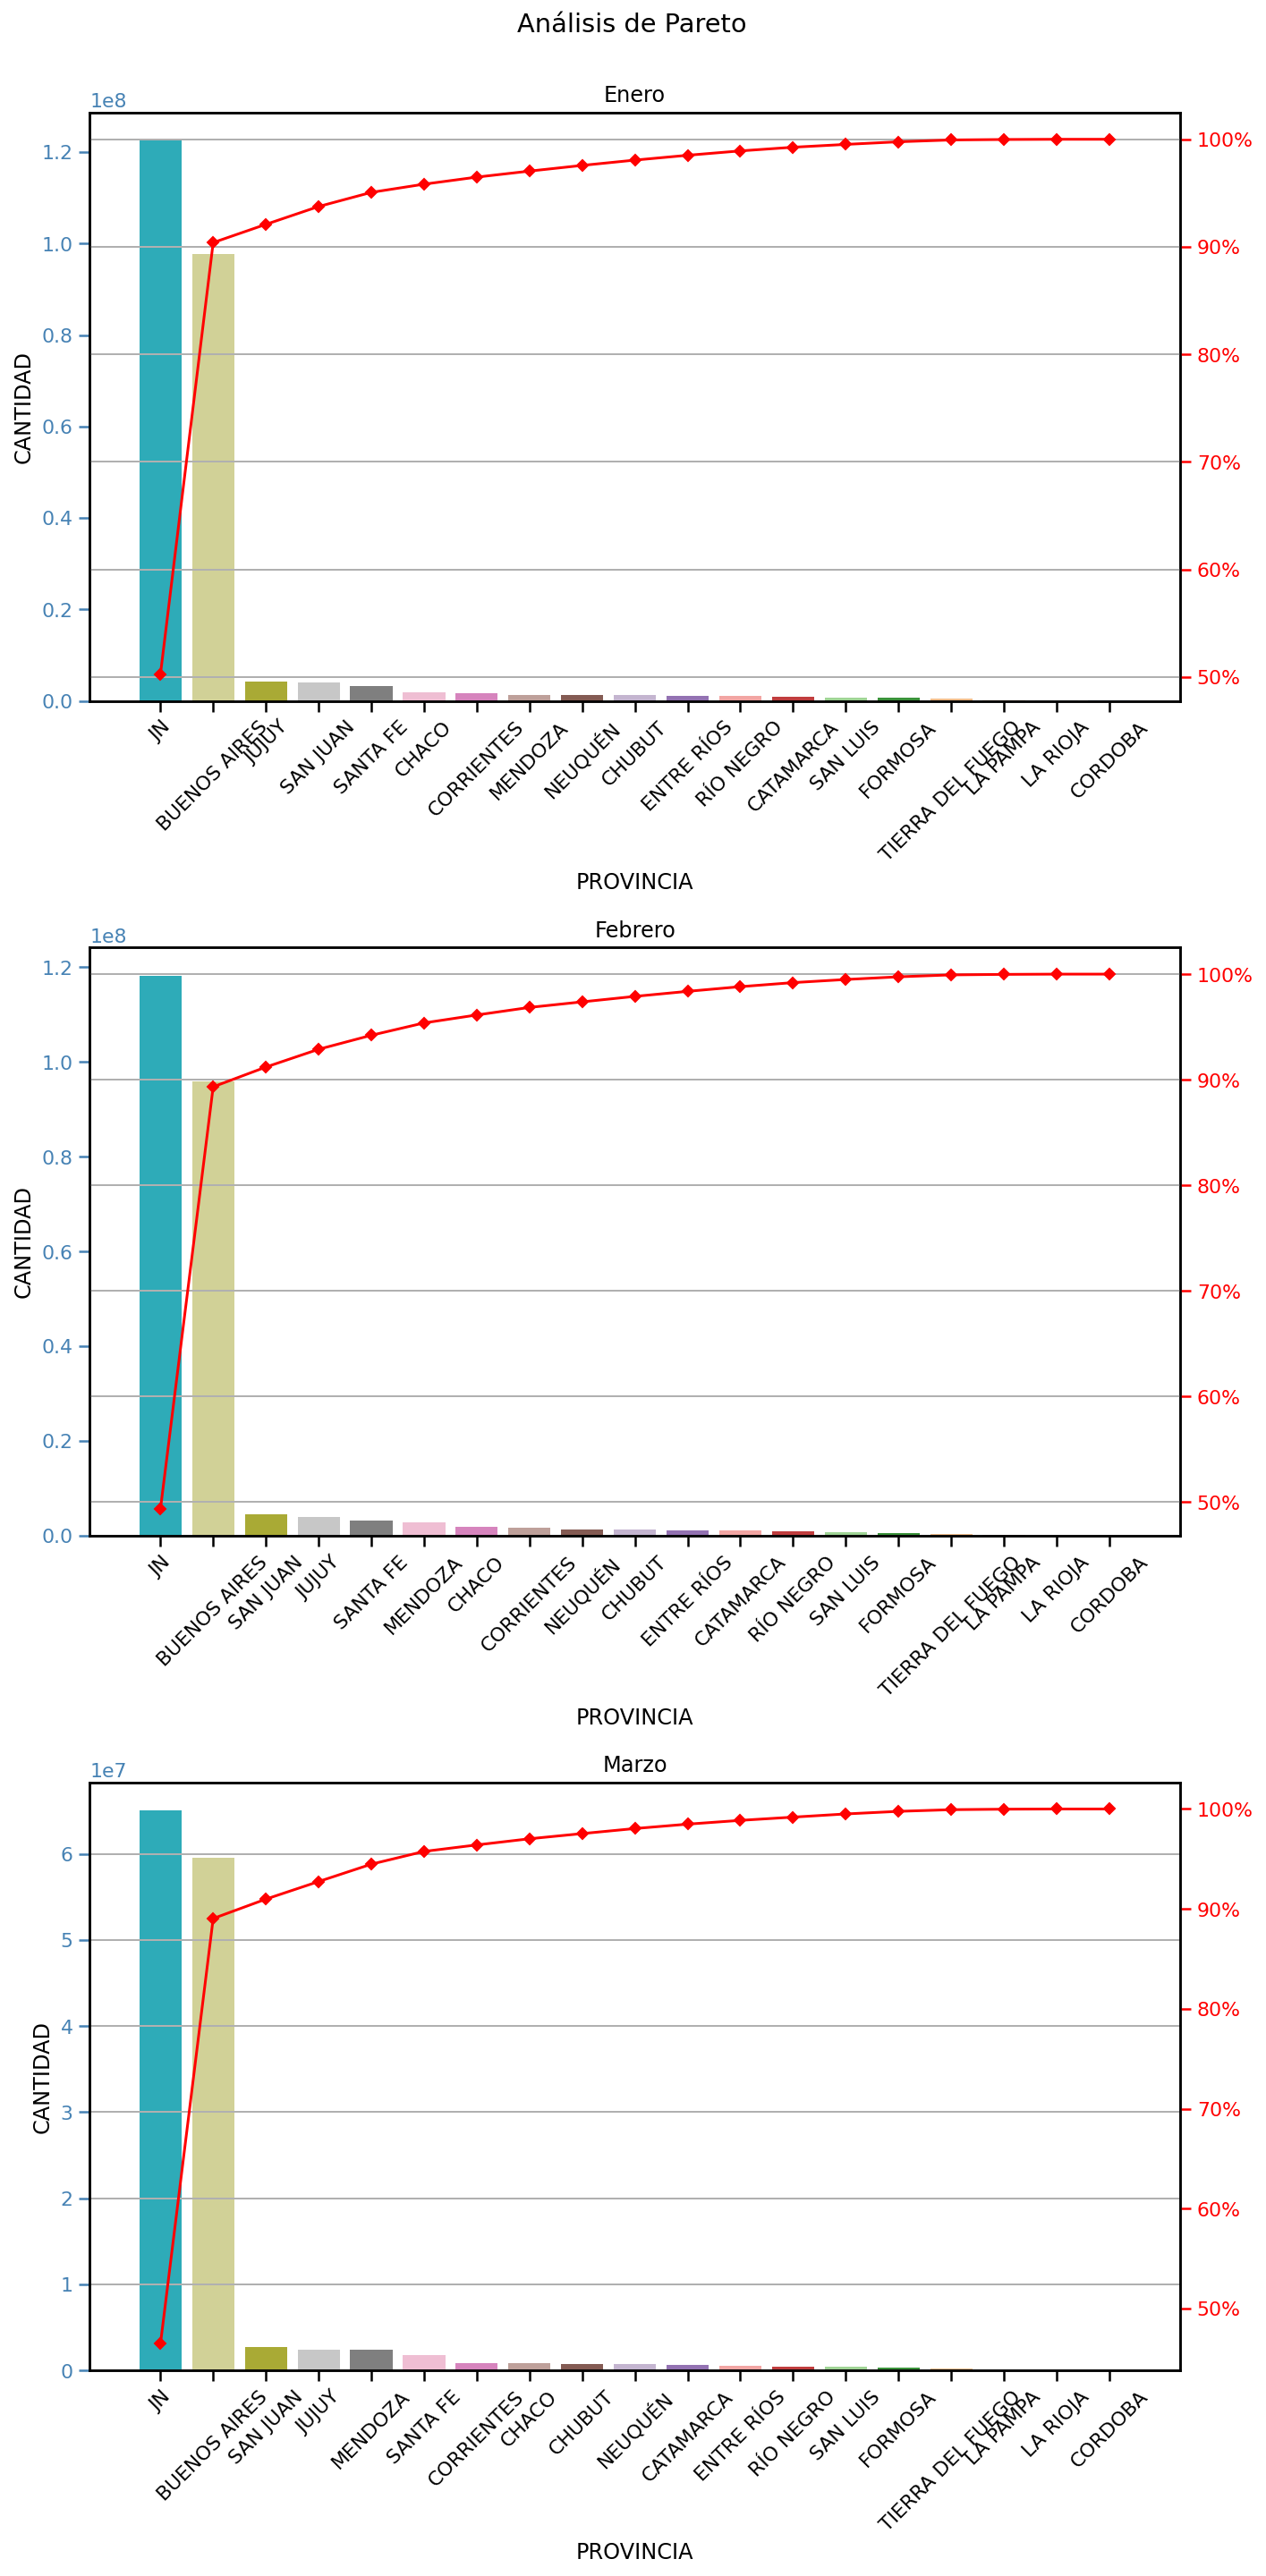

In [78]:
# Armo una lista con mis dataframes
mes_list = [enero,febrero,marzo]
mes_list_Str = ['Enero','Febrero','Marzo']

# Creamos la figura
fig, ax = plt.subplots(3, figsize=(10,20))
plt.subplots_adjust(wspace=0.50, hspace=0.5)
fig.suptitle('Análisis de Pareto',y=1)

for i in range(0,3):
    Pareto( mes_list[i], mes_list_Str[i], i)

    
# Mostramos los Pareto

plt.show()





    Como podemos observar la categoría {JN} representa más del 50%, y junto con {Buenos Aires} acaparan el 90% de los pasajes durante los meses de verano. Deberíamos investigar a qué provincia o zona corresponde {JN}. A continuacion entonces desglosaremos los transportes utilizados en Buenos Aires durante el verano

<hr>

# Análisis de transporte en la provincia de Buenos Aires en los meses de verano

In [79]:
# Nuevamente casteamos a tipo datetime la columna {DIA_TRANSPORTE}. Por alguna razón no mantiene el formato
df['DIA_TRANSPORTE'] = pd.to_datetime(df['DIA_TRANSPORTE'])

# Extraemos a qué mes corresponde cada entrada
df['Mes'] = df['DIA_TRANSPORTE'].dt.month
dfV = df.loc[df['Mes'].isin(Meses_verano)]
dfV

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,Mes
0,2020-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,2154,1
1,2020-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,1492,1
2,2020-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1889,1
3,2020-01-01,AUTOBUSES BUENOS AIRES S.R.L. – TRANSPORTE LAR...,BS_AS_LINEA_514,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,ALMIRANTE BROWN,4669,1
4,2020-01-01,EL URBANO SRL,BS_AS_LINEA_522,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,LANUS,187,1
...,...,...,...,...,...,...,...,...,...,...
328708,2020-03-12,LA COMARCA SA,Línea E,NO,COLECTIVO,MUNICIPAL,RÍO NEGRO,VIEDMA,831,3
328709,2020-03-12,EMPRESA CEFERINO SOCIEDAD ANONIMA,Línea G,NO,COLECTIVO,MUNICIPAL,RÍO NEGRO,VIEDMA,98,3
328710,2020-03-12,UNION PLATENSE SRL,NORTE MUNICIPAL,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,LA PLATA,5388,3
328711,2020-03-12,A T A C O NORTE S A C I,RES_PUERTO_TIROL_Y VIC,NO,COLECTIVO,PROVINCIAL,CHACO,SN,837,3


In [80]:
# Eliminamos las columnas que no vamos a utilizar
dfV=dfV.drop(columns=['DIA_TRANSPORTE','NOMBRE_EMPRESA','LINEA','JURISDICCION','AMBA','CANTIDAD','MUNICIPIO'])
dfV

,TIPO_TRANSPORTE,PROVINCIA,Mes
0,COLECTIVO,BUENOS AIRES,1
1,COLECTIVO,BUENOS AIRES,1
2,COLECTIVO,BUENOS AIRES,1
3,COLECTIVO,BUENOS AIRES,1
4,COLECTIVO,BUENOS AIRES,1
...,...,...,...
328708,COLECTIVO,RÍO NEGRO,3
328709,COLECTIVO,RÍO NEGRO,3
328710,COLECTIVO,BUENOS AIRES,3
328711,COLECTIVO,CHACO,3


In [81]:
# Divido mi dataset por mes
enero = dfV[dfV['Mes']==1]
febrero = dfV[dfV['Mes']==2]
marzo = dfV[dfV['Mes']==3]

In [82]:
# Tipos de transporte

print(enero['TIPO_TRANSPORTE'].value_counts())
print('----------------------------------------------')
print(febrero['TIPO_TRANSPORTE'].value_counts())
print('----------------------------------------------')
print(marzo['TIPO_TRANSPORTE'].value_counts())
print('----------------------------------------------')

COLECTIVO    29990
TREN           549
SUBTE          217
LANCHAS        140
Name: TIPO_TRANSPORTE, dtype: int64
----------------------------------------------
COLECTIVO    29128
TREN           508
SUBTE          203
LANCHAS        126
Name: TIPO_TRANSPORTE, dtype: int64
----------------------------------------------
COLECTIVO    29834
TREN           499
SUBTE          216
LANCHAS        103
Name: TIPO_TRANSPORTE, dtype: int64
----------------------------------------------


    Evidentemente, el colectivo es el medio de transporte público más utilizado durante los meses de verano en la provincia de {Buenos Aires} 
   

<hr>

# __Conclusiones__

### El core del análisis de este dataset estuvo centrado en: 
* Estudiar el dataset, tipos de datos, valores nulos, y detectar variables de interés. 
* Tratamiento de valores nulos
* Feature engineering

###  Advertencia
Se considera que la categoría de {PROVINCIA} 'JN' debe ser investigada para determinar a qué zona de Argentina refiere. La misma representa más del 50% de la cantidad de viajes en el dataset, influyendo de sobremanera en las imputaciones de valores nulos, sin importar el estadístico que se considere. Por otro lado, afecta en la interpretación y a la deducción de resultados.

### Resultados

Tras analizar brevemente los datos, observamos la presencia de valores nulos en 2561 entradas, en las columnas PROVINCIA, MUNICIPIO Y JURISDICCION, realizamos el reemplazo de nulos con sklearn utilizando KNN, y obtenemos los correspondientes reemplazos. Todos los nulos ahora son 'JN','SD' y 'NACIONAL' respectivamente.  
Se observa una dicotomia entre la cantidad de entradas registradas para cada provincia, y la cantidad de pasajes imputados a cada una de ellas. Por ejemplo, Mendoza es una provincia con más de 60000 entradas en este dataset, pero luego su representatividad en términos de volumen de pasajes es casi nula. Este hecho puede ser un resultado de la asimetría en la distribución de pasajes a lo largo del año, concentrandose en los meses de verano, y puntualmente en las provincias {Buenos Aires} y {JN}. 
Dicha asimetría queda clara al comparar los valores de la media y la mediana en la variable {CANTIDAD}, siendo de 1313 y 5026 pasajes respectivamente. 
Posteriormente, nos hemos centrado en los meses de Enero, Febrero, y Marzo, donde se concentraban valores muy altos de pasajes diarios, por encima de los 300000. Una posible explicación para este fenómeno es el hecho de coincidir con la temporada de verano en Argentina, donde se movilizan masas de turistas hacia todo el país. Pudimos observar qué, nuevamente, {Buenos Aires} y {JN} comprenden más del 90% del total de pasajes. {JN} distorsiona los resultados, pero en {Buenos Aires} naturalmente esperábamos este pico, debido a su zona costera.  
Sumergiéndonos más profundo en {Buenos Aires}, realizamos un desglose del transporte público para los meses de verano, donde se observó la predominancia del colectivo por sobre el Tren, Subte, o lancha. 

Con esta información, la provincia de {Buenos Aires} podría planificar los mantenimientos, acondicionamientos o incorporaciones de flotas para cubrir la demanda y mejorar su recaudación. Es un hecho, que con los actuales cepos y trabas para viajes al exterior, el turismo interno se multiplicará, pudiéndo resultar en un colapso del sistema de transporte público en caso de no ser previsto. 